In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r'C:\Users\User\juypter\files\car_evaluation.csv')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
# Rename columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot','safety','class']
data.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
for col in col_names:
    print(data[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [8]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
x = data.drop(['class'],axis=1)
y = data['class']   

In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# print traing and testing

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1381, 6) (346, 6)
(1381,) (346,)


In [12]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [13]:
# catepory encoder

# !pip install category_encoders

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)
x_train.head()
x_test.head()


,buying,maint,doors,persons,lug_boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


In [14]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


In [15]:
# Random forest classifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

   
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators= 100,random_state=0 )
    
# Train the classifier on the training data

rf_classifier.fit(x_train, y_train)
    
# Make predictions on the test data

y_pred = rf_classifier.predict(x_test)

# accuracy

accuracy_score(y_test, y_pred)
    
    

0.9479768786127167

In [16]:
print(y_pred)

['unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'good'
 'unacc' 'unacc' 'vgood' 'acc' 'acc' 'unacc' 'unacc' 'good' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'good' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'vgood' 'unacc' 'unacc' 'acc' 'unacc' 'vgood' 'acc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'vgood' 'unacc' 'unacc'
 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'good' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'good' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'acc'
 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'acc' 'unacc' 'acc' 'acc' 'unacc' 'good' 'unacc' 'unacc' 'unacc' 'unacc'


In [17]:
# create classifier with  100 e_estimators

from sklearn.ensemble import RandomForestClassifier
rf_100 = RandomForestClassifier(n_estimators=100,random_state=0)
rf_100.fit(x_train, y_train)



RandomForestClassifier(random_state=0)

In [18]:
# view the feature scores 
score = pd.Series(rf_100.feature_importances_,index = x.columns).sort_values(ascending=False)
score 

safety      0.290475
persons     0.243671
buying      0.211239
maint       0.117199
lug_boot    0.077384
doors       0.060033
dtype: float64

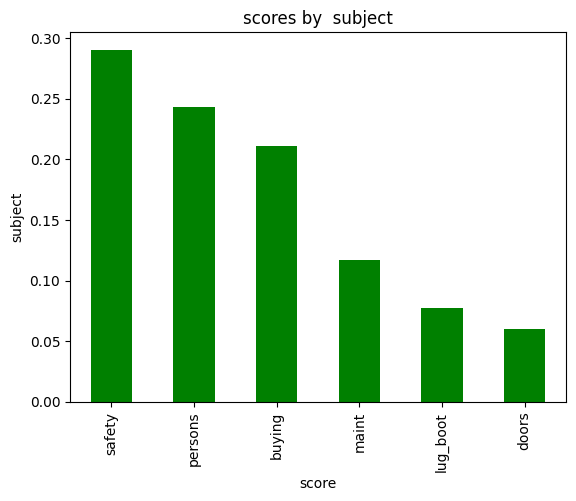

In [19]:
# creating seaborn bar plot

score.sort_values(ascending=False).plot(kind ='bar',color = 'green')
plt.title('scores by  subject')
plt.ylabel('subject')
plt.xlabel('score')
plt.show()

In [20]:
# Build the random forest model on selected coumns features

X = data.drop(['doors'],axis=1)

In [21]:
# print confusion matrix

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix",cm)


# print accuracy score 
ac = accuracy_score(y_test, y_pred)
print("accuracy score", ac) 



confusion matrix [[ 73   3   0   1]
 [  3   8   0   4]
 [  3   0 234   0]
 [  4   0   0  13]]
accuracy score 0.9479768786127167


In [22]:
# classification report 
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("classification report",cr)

classification report               precision    recall  f1-score   support

         acc       0.88      0.95      0.91        77
        good       0.73      0.53      0.62        15
       unacc       1.00      0.99      0.99       237
       vgood       0.72      0.76      0.74        17

    accuracy                           0.95       346
   macro avg       0.83      0.81      0.82       346
weighted avg       0.95      0.95      0.95       346

